In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

#데이터셋 불러오기
data = pd.read_csv('D:\OneDrive\문서\GitHub\TIL\MachineLearning\비지도학습\군집화 모델\Mall_Customers.csv')

#데이터 확인
print(data.head())

#필요한 열 선택
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

#데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


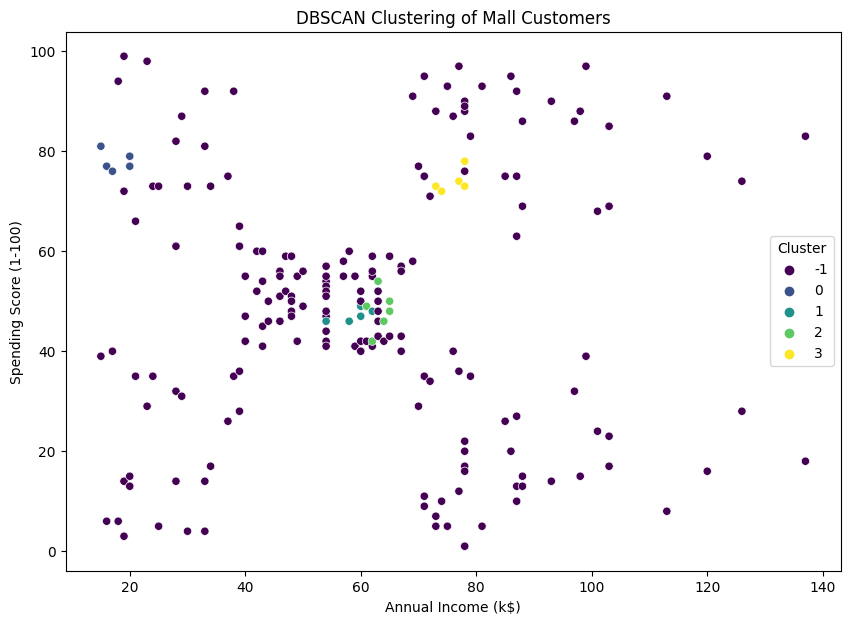

In [2]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# DBSCAN 모델 생성
dbscan = DBSCAN(eps=5, min_samples=5)

# 모델 학습 및 예측
data['Cluster'] = dbscan.fit_predict(X)

# 군집화 결과 시각화
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='viridis')
plt.title('DBSCAN Clustering of Mall Customers')
plt.show()

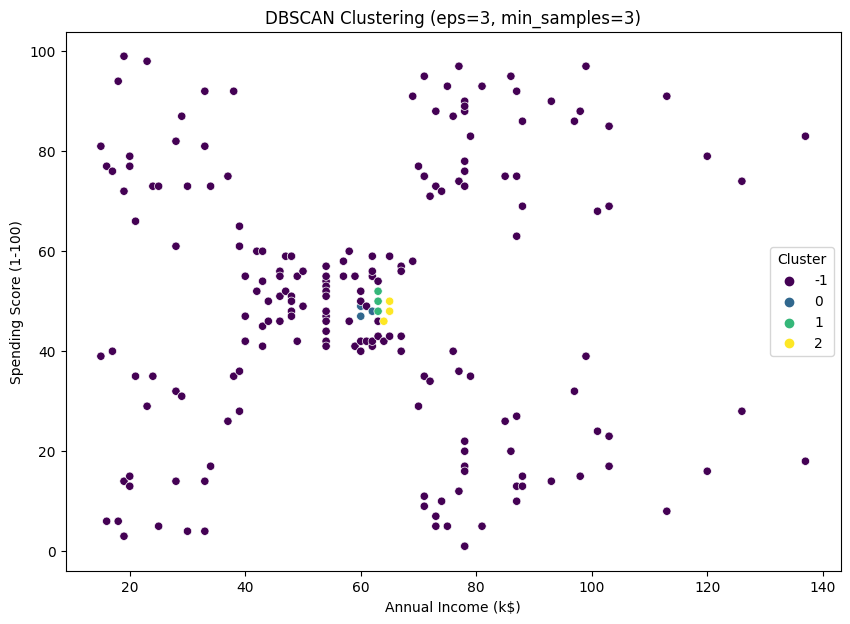

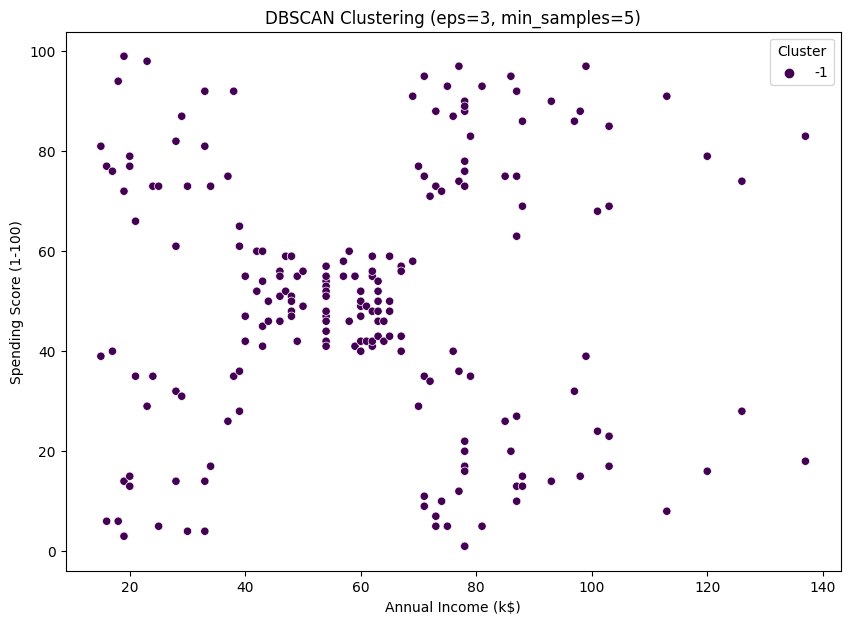

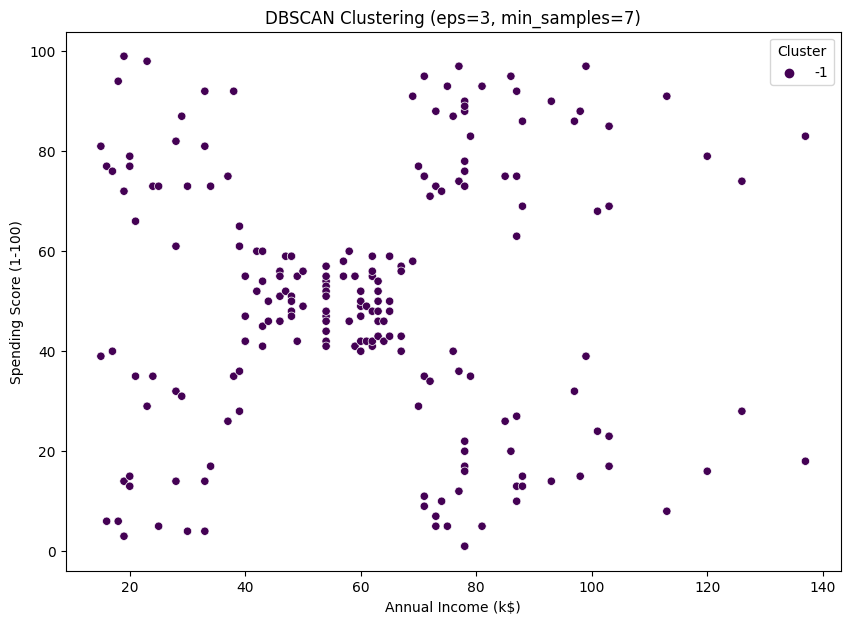

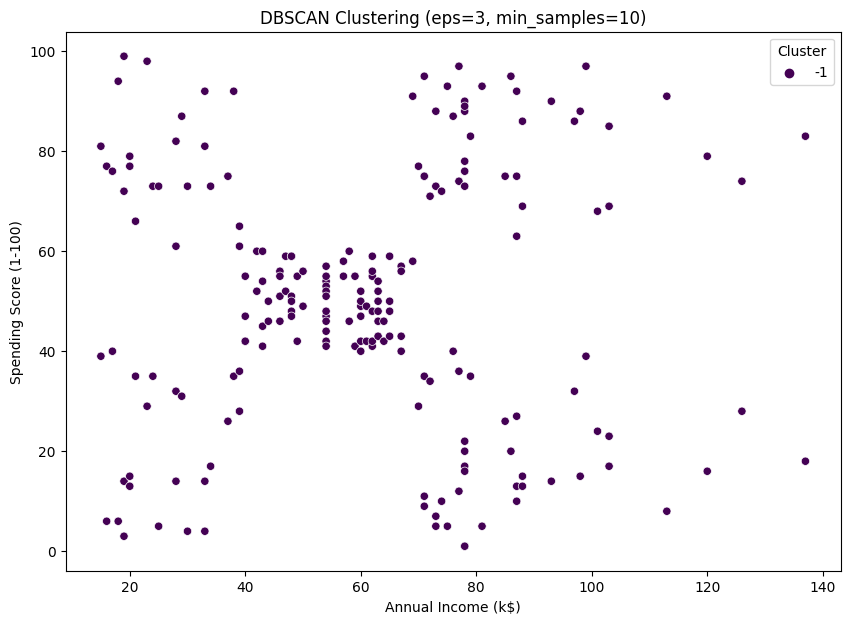

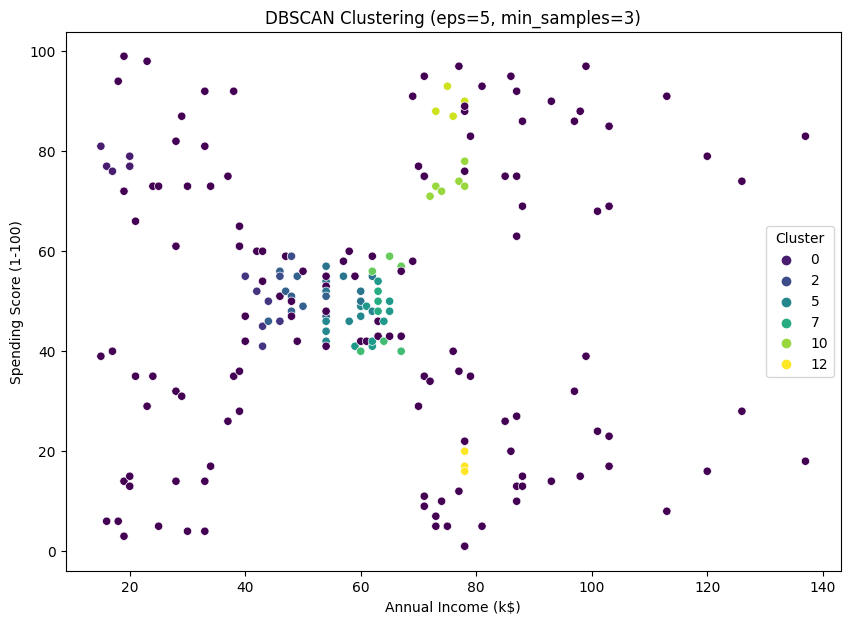

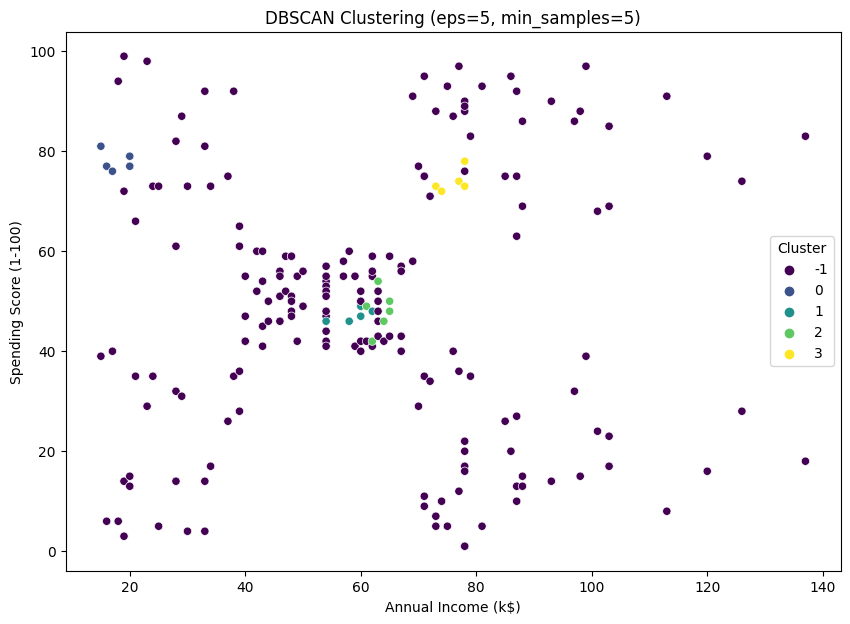

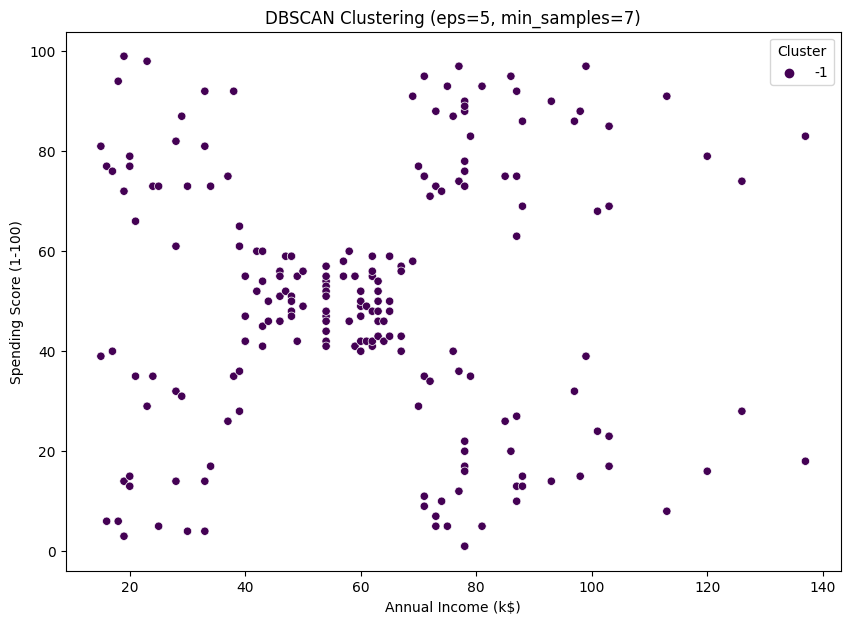

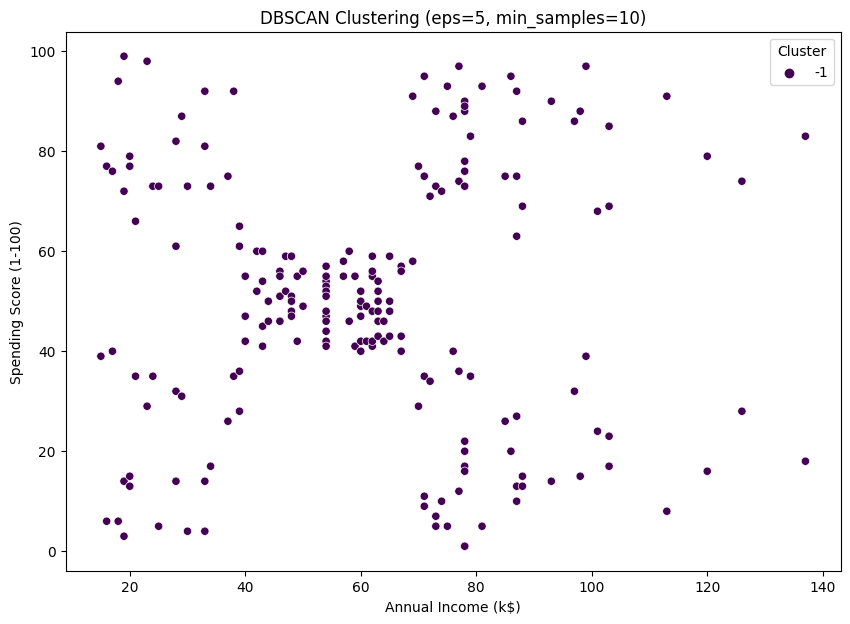

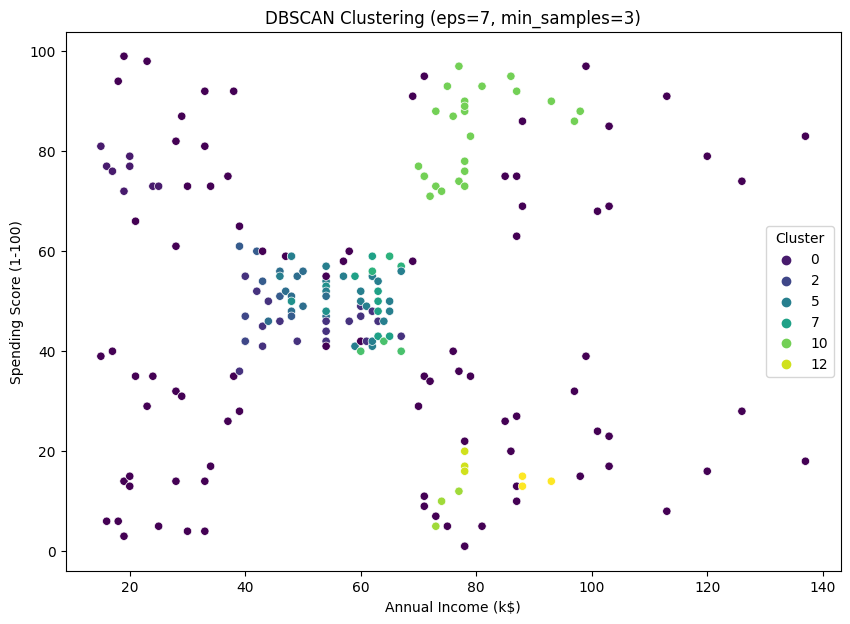

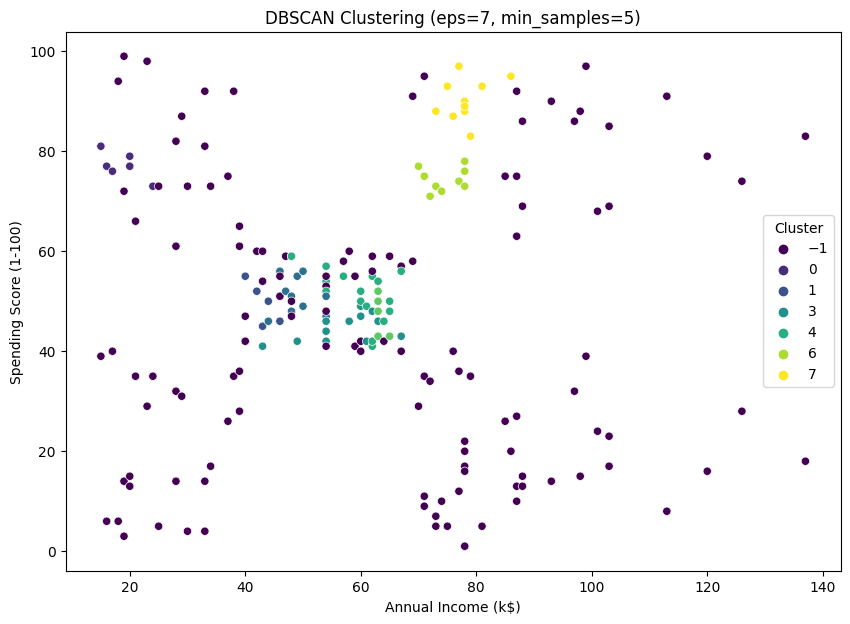

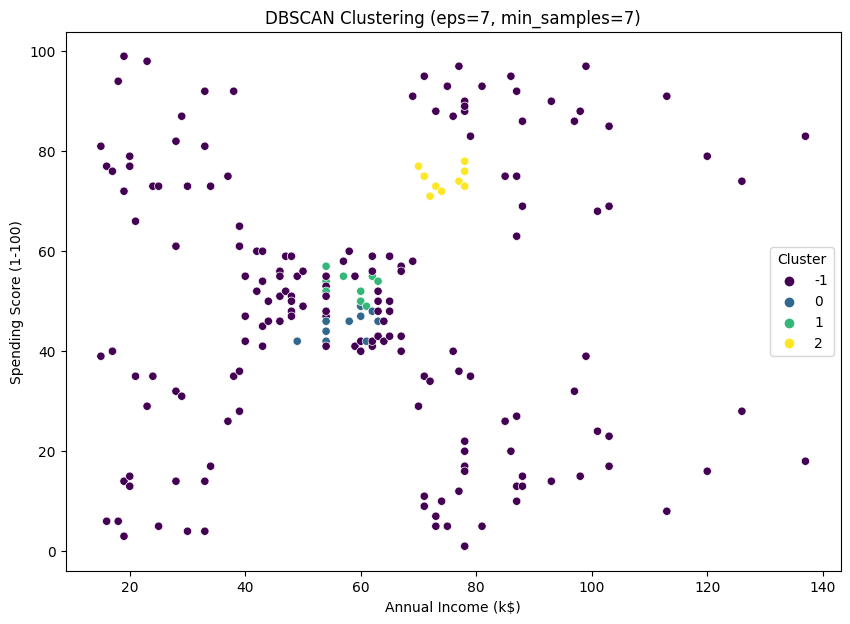

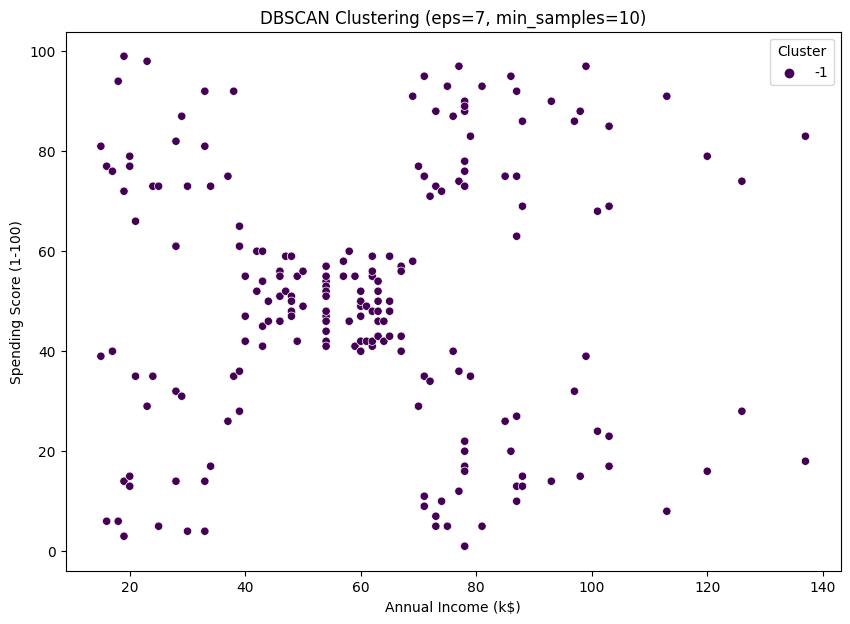

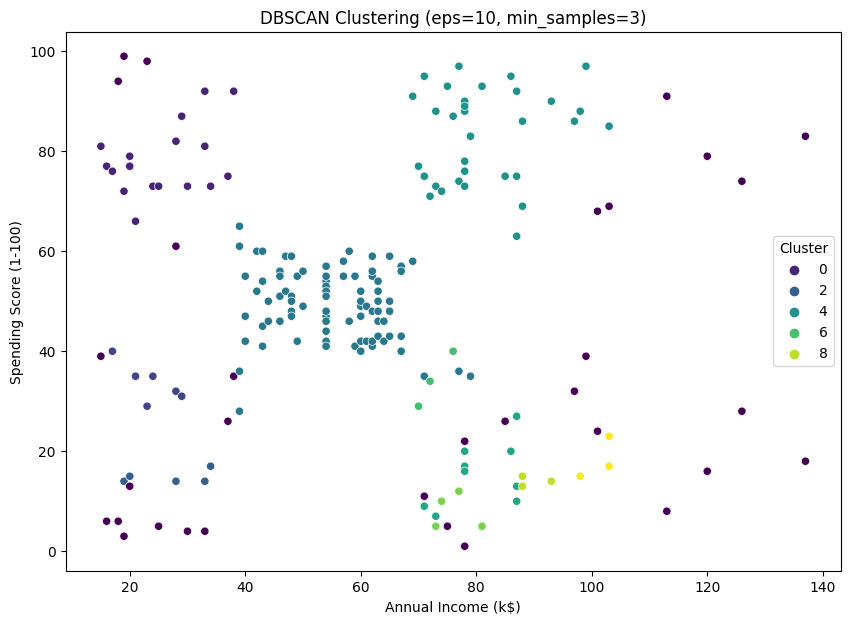

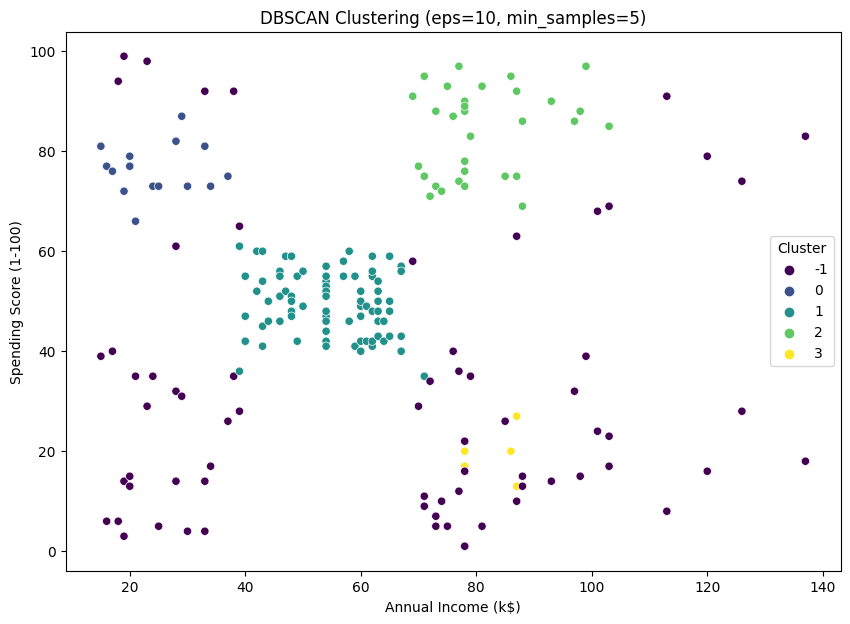

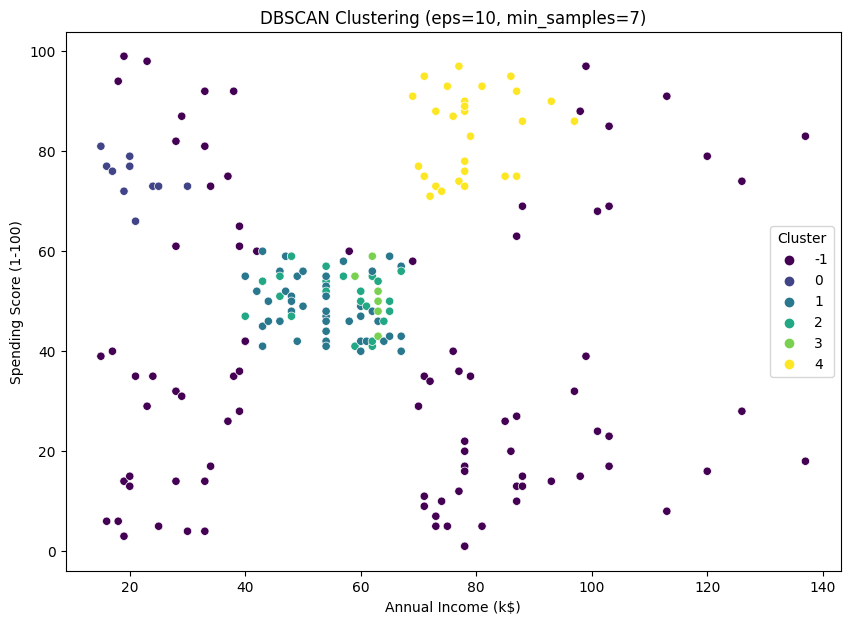

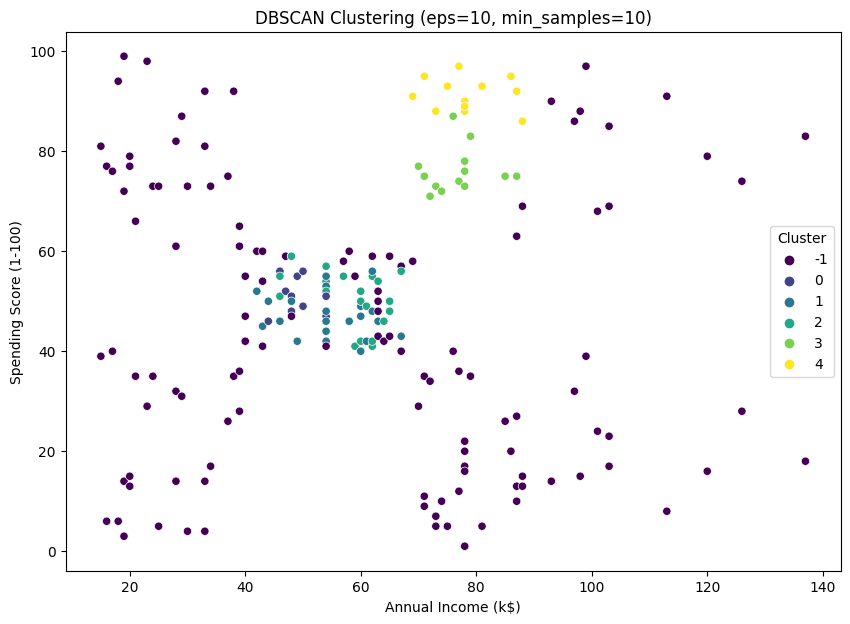

In [4]:
# 다양한 eps와 min_samples 값 시도
eps_values = [3, 5, 7, 10]
min_samples_values = [3, 5, 7, 10]

#eps, min_samples의 값들의 경우의 수 모두 시각 자료 출력.
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        data['Cluster'] = dbscan.fit_predict(X)
        
        plt.figure(figsize=(10, 7))
        sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='viridis')
        plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
        plt.show()

DBSCAN 성능은 eps와 min_samples 파라미터에 크게 의존한다. 적절한 파라미터를 찾기 위해서 여러 값을 시도해볼 수 있다.